# Project Overview
In this project, we are going to scrape British Airways reviews of Skytrax. Then, we are going to do some data exploration, generate WordClouds, perform sentiment analysis and create an LDA topic model.

# Problem Statement
The project goal is to use text analytics and Natural Language Processing (NLP) to extract actionable insights from the reviews and help the airline improve their satisfaction rate.

# Methodologies
(1) Web Scraping

The airline reviews will be scraped from Skytrax by using requests with BeautifulSoup. The detailed steps are covered in the next section.

(2) Exploratory Data Analysis (EDA)

We will use pie chart, histogram, and seaborn violin plot to get a better understanding of the reviews and ratings data.

(3) WordClouds

In order to generate more meaningful WordClouds, we will customize some extra stop words and use lemmatization to remove closely redundant words.

(4) Sentiment Analysis ("Sentiment analysis British Airway")

The sentiment analysis helps to classify the polarity and subjectivity of the overall reviews and determine whether the expressed opinion in the reviews is mostly positive, negative, or neutral.

In [ ]:
# https://www.airlinequality.com/airline-reviews/british-airways

# Instalation of packages

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 100 total reviews
Scraping page 2


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 200 total reviews
Scraping page 3


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 300 total reviews
Scraping page 4


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 400 total reviews
Scraping page 5


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 500 total reviews
Scraping page 6


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 600 total reviews
Scraping page 7


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 700 total reviews
Scraping page 8


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 800 total reviews
Scraping page 9


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 900 total reviews
Scraping page 10


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1000 total reviews


C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_20472\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [4]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Business Class,Sydney to London via Singapore,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | I will never travel with Br...
1,NaN,Solo Leisure,Business Class,Heathrow to Faro,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | I am already in Portugal so...
2,NaN,Business,Economy Class,London to Barcelona,May 2023,NaN,NaN,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | Terrible. Avoid this airlin...
3,NaN,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,✅ Trip Verified | Despite being a gold member...
4,Boeing 787,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Not Verified | Regarding the aircraft and seat...


Max value for Seat Comfort, Cabin Staff Service, Food & Beverages, Inflight Entertainment, Ground Service, Wifi & Connectivity, Value For Money is 5

In [21]:
df.to_csv("BA_full_review.csv", index=False)

# Data Cleaning

In [9]:
df = pd.read_csv('BA_full_review.csv')

In [49]:
df.shape

(1000, 14)

In [11]:
#removing '✅ Trip Verified |', 'Not Verified |'

df["reviews"] = df["reviews"].str.replace("✅ Trip Verified ", "")
df["reviews"] = df["reviews"].str.replace("Not Verified ", "")
df["reviews"] = df["reviews"].str.replace("|", "")

C:\Users\kater\AppData\Local\Temp\ipykernel_20472\1859901526.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews"] = df["reviews"].str.replace("|", "")


In [12]:
df.head(3)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Business Class,Sydney to London via Singapore,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,I will never travel with British Airways aga...
1,NaN,Solo Leisure,Business Class,Heathrow to Faro,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,I am already in Portugal so contacted them t...
2,NaN,Business,Economy Class,London to Barcelona,May 2023,NaN,NaN,NaN,NaN,1.0,NaN,1,no,Terrible. Avoid this airline. It’s now becom...


# Data Analysis

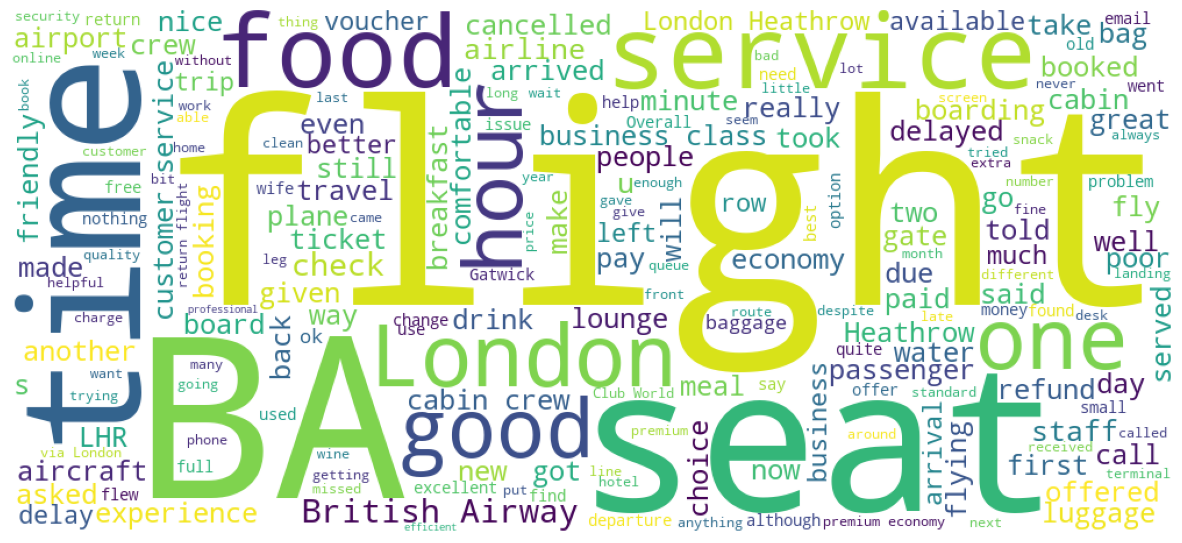

In [13]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### From the wordcloud above, we can see the key of topics in customer review are flight, seat, service and time, food and staff. 

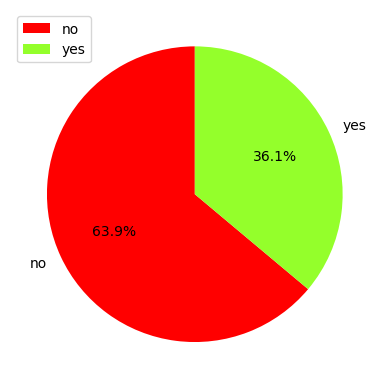

In [30]:
rec = df.groupby('Recommended')['reviews'].count().reset_index()
mycolors = ["r", "#94ff2b"]

plt.pie(rec['reviews'], labels = rec['Recommended'],autopct='%1.1f%%',colors = mycolors, startangle=90)
plt.legend()
plt.show()


### Latest data shows that 63.9% of passengers are dissatisfied with British Airways services and wont recommend it.

### Dissatisfied custumers overal review

In [31]:
not_rec = df[df['Recommended'] == 'no']
not_rec.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,564.000000,557.000000,464.000000,320.000000,588.000000,152.000000,639.000000
mean,2.101064,2.423698,1.864224,2.128125,1.926871,1.546053,1.602504
std,1.085378,1.326275,1.058184,1.213491,1.208893,1.041133,0.879081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Dissatisfied custumers. Food review

In [35]:
data = not_rec[not_rec['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

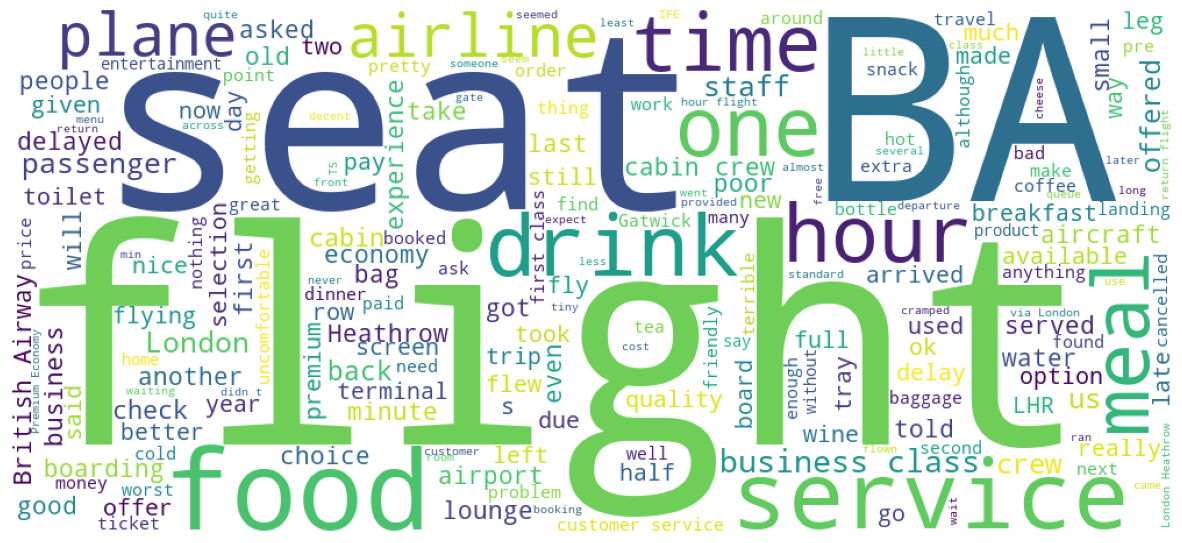

In [36]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Dissatisfied custumers. Value for money

In [37]:
data = not_rec[not_rec['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

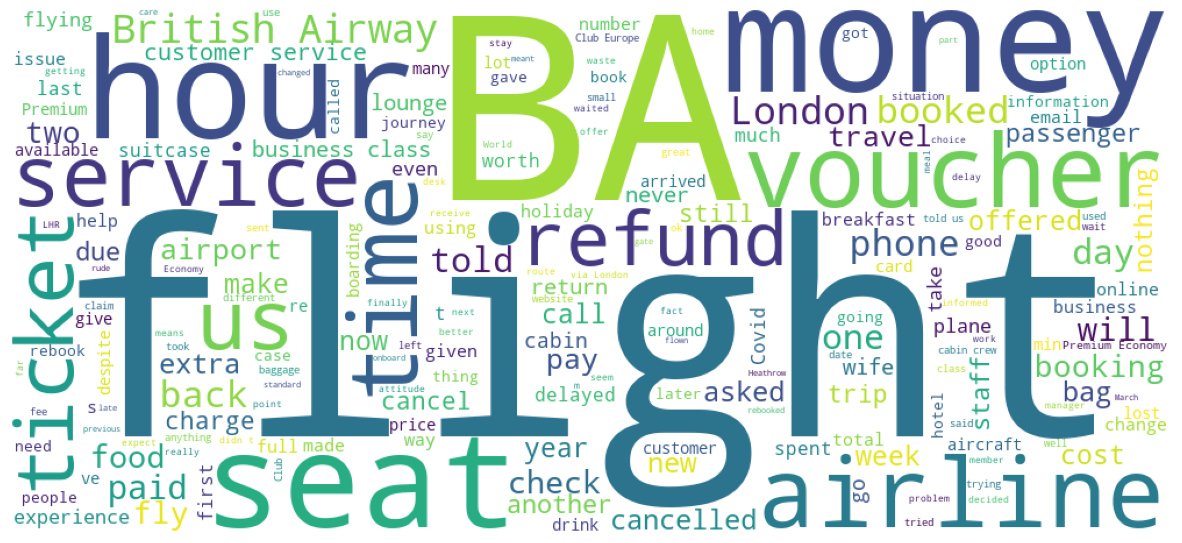

In [38]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Distribution per Class of travel

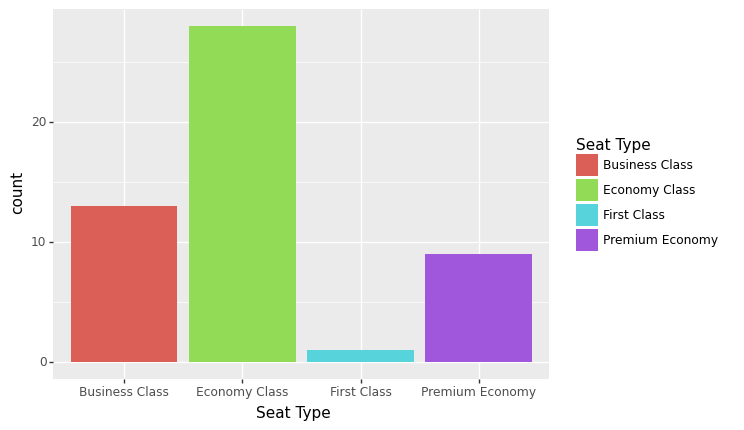

<ggplot: (114220657396)>

In [42]:
(ggplot(data)
+aes(x='Seat Type', fill="Seat Type")
+geom_bar())

### Customer satisfaction per class of travel

In [76]:
df_grouped_cabin = df.groupby(by=['Seat Type', 'Recommended'])
df_sum = df_grouped_cabin.sum()
print(df_sum)

                             Seat Comfort  Cabin Staff Service  \
Seat Type       Recommended                                      
Business Class  no                  365.0                413.0   
                yes                 521.0                604.0   
Economy Class   no                  647.0                761.0   
                yes                 684.0                786.0   
First Class     no                   46.0                 50.0   
                yes                  80.0                 86.0   
Premium Economy no                  127.0                126.0   
                yes                 133.0                145.0   

                             Food & Beverages  Inflight Entertainment  \
Seat Type       Recommended                                             
Business Class  no                      321.0                   201.0   
                yes                     550.0                   292.0   
Economy Class   no                      424.0  

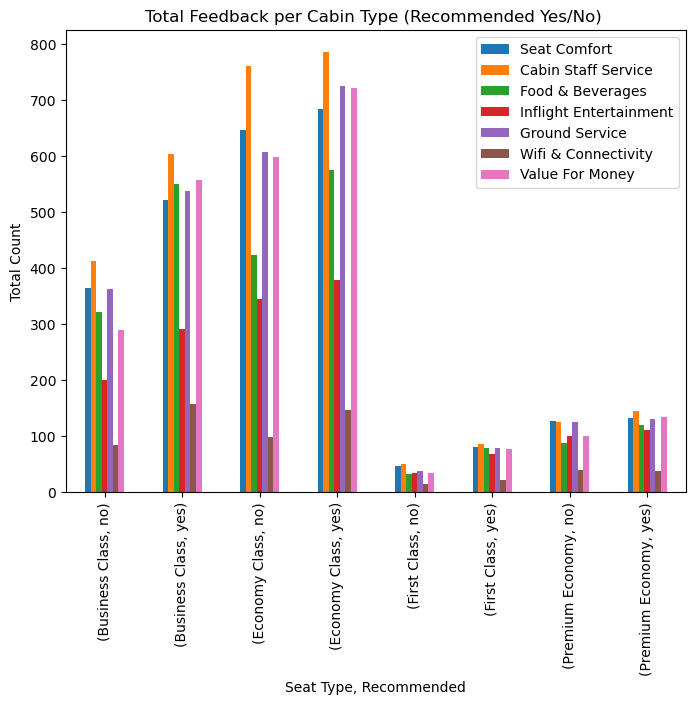

In [81]:
import matplotlib.pyplot as plt

df_grouped_cabin = df.groupby(by=['Seat Type', 'Recommended'])
df_sum = df_grouped_cabin.sum()

ax = df_sum.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel('Seat Type, Recommended')
ax.set_ylabel('Total Count')
ax.set_title('Total Feedback per Cabin Type (Recommended Yes/No) ')

plt.show()


### From the graphs above we can see:
#### *Business and First class are seen as cabins with the best value for money between BA customers. 
#### *Ground service appears to be significantly better for customers of those cabins as well.  
#### *Food & Beverages were having bigger satisfactory rate in  Premium economy, Business and First class. 
#### *Seat Comfort and Cabin Staff Service were recognized sugnificantly better Business and First class. 

### Choice of cabin and Type of Traveler

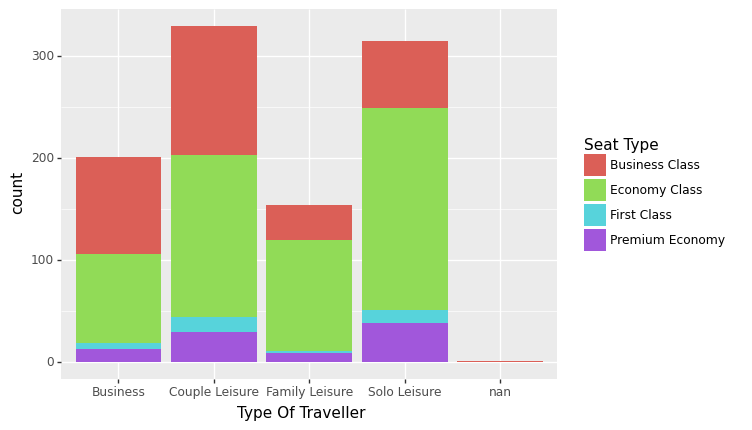

<ggplot: (114225381099)>

In [99]:
(ggplot(df)
+aes(x='Type Of Traveller', fill="Seat Type")
+geom_bar())

#### Economy is the dominant choise through all type of travelers. Bussiness class is a popular choice for business travel and couple travel

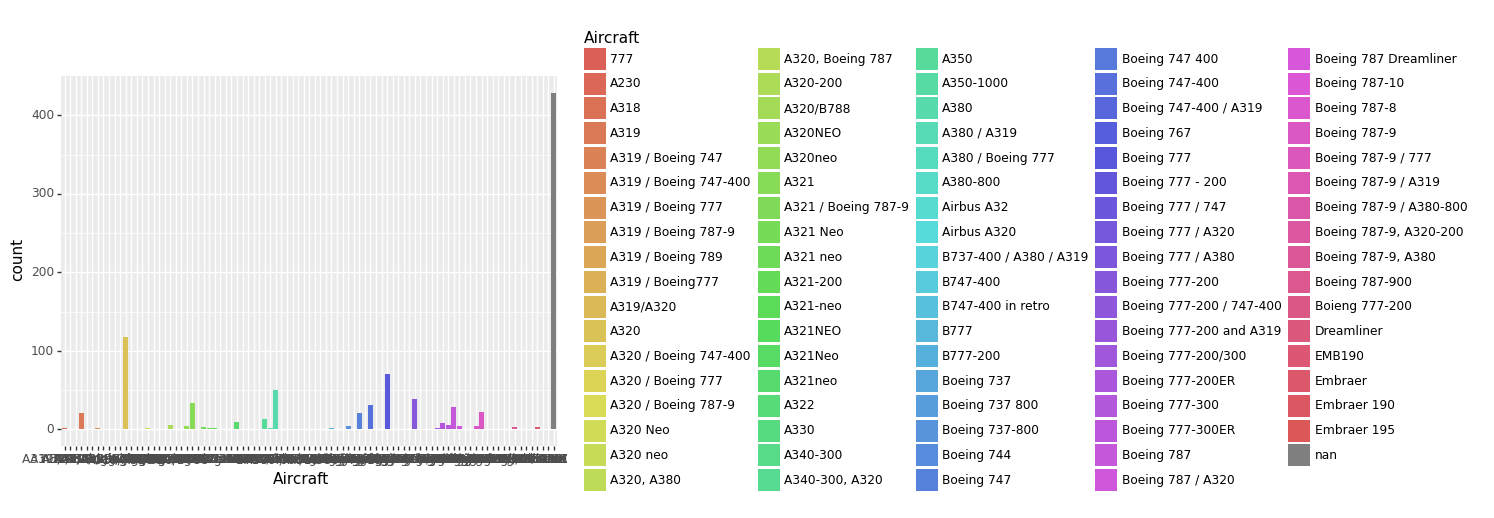

<ggplot: (114225161439)>

In [93]:
# Count the number of occurrences of each aircraft
(ggplot(df)
+aes(x='Aircraft', fill="Aircraft")
+geom_bar())